In [2]:
from census import Census

import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [3]:
artist_df = pd.read_csv('data.csv')
artist_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [5]:
grouped_df = year_df.groupby(['year'])['id'].count()
grouped_df

year
2017    2156
2018    2714
2019    2329
2020    4294
2021    1840
Name: id, dtype: int64

<AxesSubplot:xlabel='year'>

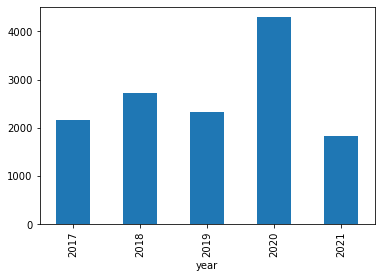

In [6]:
grouped_df.plot(kind='bar',x='year')

In [7]:
year2021_df = artist_df.loc[artist_df['year'] == 2021].sort_values(['popularity'],ascending=False)
year2021_df_top = year2021_df.head(500)
year2021_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.536238,0.603053,184905.794000,0.432987,0.128000,0.386232,5.244000,0.152574,-11.647434,0.724000,28.216000,0.106897,116.570494,0.366639,2021.0
std,0.398518,0.173800,90955.157799,0.322529,0.334424,0.432165,3.381617,0.114069,6.524168,0.447464,27.148618,0.116315,33.913513,0.267327,0.0
min,0.000009,0.000000,32373.000000,0.006320,0.000000,0.000000,0.000000,0.046300,-28.235000,0.000000,2.000000,0.000000,0.000000,0.000000,2021.0
25%,0.111500,0.515000,136069.000000,0.045300,0.000000,0.000000,2.000000,0.092300,-19.540000,0.000000,4.000000,0.037600,88.042000,0.120000,2021.0
50%,0.554000,0.631000,178242.500000,0.484000,0.000000,0.002920,5.000000,0.112000,-9.867500,1.000000,16.000000,0.065200,112.000500,0.317000,2021.0
75%,0.977000,0.723250,205257.750000,0.714250,0.000000,0.892000,8.000000,0.154000,-5.517250,1.000000,53.250000,0.132250,137.873000,0.592500,2021.0
max,0.993000,0.964000,783960.000000,0.970000,1.000000,0.969000,11.000000,0.739000,-1.948000,1.000000,100.000000,0.944000,210.233000,0.971000,2021.0


In [8]:
year2020_df = artist_df.loc[artist_df['year'] == 2020].sort_values(['popularity'],ascending=False)
year2020_df_top = year2020_df.head(500)
year2020_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.231984,0.698976,191013.242000,0.633242,0.5200,0.004637,5.320000,0.169551,-6.336784,0.562000,80.762000,0.122517,122.663666,0.499572,2020.0
std,0.244232,0.131960,39001.094068,0.156031,0.5001,0.036285,3.611605,0.118779,2.221310,0.496638,4.828248,0.112130,29.834048,0.217530,0.0
min,0.000070,0.298000,64654.000000,0.186000,0.0000,0.000000,0.000000,0.037700,-13.763000,0.000000,75.000000,0.025000,61.311000,0.039700,2020.0
25%,0.037950,0.621000,168365.000000,0.534000,0.0000,0.000000,2.000000,0.096425,-7.523500,0.000000,77.000000,0.045350,96.986500,0.329750,2020.0
50%,0.146000,0.712000,191154.500000,0.640000,1.0000,0.000000,6.000000,0.123000,-6.066500,1.000000,80.000000,0.071900,122.958000,0.501000,2020.0
75%,0.346000,0.795000,213379.750000,0.743000,1.0000,0.000014,8.000000,0.202250,-4.769500,1.000000,83.000000,0.164000,144.026500,0.657250,2020.0
max,0.982000,0.980000,382555.000000,0.955000,1.0000,0.642000,11.000000,0.709000,-2.028000,1.000000,96.000000,0.777000,203.863000,0.965000,2020.0


In [9]:
year2019_df = artist_df.loc[artist_df['year'] == 2019].sort_values(['popularity'],ascending=False)
year2019_df_top = year2019_df.head(500)
year2019_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.266654,0.671474,199693.86600,0.604719,0.422000,0.017717,5.286000,0.165521,-6.578564,0.596000,75.920000,0.116785,121.104970,0.491688,2019.0
std,0.262825,0.142968,45577.75795,0.178257,0.494373,0.091475,3.613075,0.126242,2.999923,0.491189,4.402313,0.113753,30.477712,0.220974,0.0
min,0.000118,0.077100,91870.00000,0.016700,0.000000,0.000000,0.000000,0.040900,-24.639000,0.000000,70.000000,0.025100,62.446000,0.000010,2019.0
25%,0.060800,0.574750,173984.50000,0.495750,0.000000,0.000000,2.000000,0.096125,-7.772750,0.000000,73.000000,0.042550,97.530500,0.326000,2019.0
50%,0.171500,0.682000,196066.00000,0.623500,0.000000,0.000000,6.000000,0.120000,-6.034000,1.000000,75.000000,0.067700,118.018500,0.484500,2019.0
75%,0.391250,0.770250,221120.50000,0.727250,1.000000,0.000030,8.000000,0.181250,-4.687000,1.000000,79.000000,0.151500,140.061500,0.654500,2019.0
max,0.979000,0.974000,632625.00000,1.000000,1.000000,0.910000,11.000000,0.845000,0.457000,1.000000,91.000000,0.856000,210.164000,0.962000,2019.0


In [10]:
year2018_df = artist_df.loc[artist_df['year'] == 2018].sort_values(['popularity'],ascending=False)
year2018_df_top = year2018_df.head(500)
year2018_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.292399,0.673192,202152.15400,0.577220,0.486000,0.020067,5.310000,0.168888,-7.026734,0.620000,74.018000,0.118610,123.808604,0.424622,2018.0
std,0.277000,0.147845,44497.43971,0.176667,0.500305,0.111881,3.591057,0.124409,3.290700,0.485873,4.191995,0.110982,29.757481,0.221631,0.0
min,0.000254,0.000000,68523.00000,0.001480,0.000000,0.000000,0.000000,0.033800,-31.839000,0.000000,69.000000,0.000000,0.000000,0.000000,2018.0
25%,0.057175,0.577750,176561.25000,0.458000,0.000000,0.000000,2.000000,0.098550,-8.151250,0.000000,71.000000,0.043100,99.998000,0.247500,2018.0
50%,0.191500,0.689000,202202.00000,0.580000,0.000000,0.000000,5.000000,0.117000,-6.407500,1.000000,73.000000,0.070650,121.685500,0.392000,2018.0
75%,0.470750,0.774250,223585.50000,0.708250,1.000000,0.000065,8.000000,0.192250,-5.114750,1.000000,76.000000,0.149250,146.035500,0.572000,2018.0
max,0.985000,0.964000,417920.00000,0.964000,1.000000,1.000000,11.000000,0.830000,0.175000,1.000000,91.000000,0.579000,220.099000,0.980000,2018.0


In [11]:
year2017_df = artist_df.loc[artist_df['year'] == 2017].sort_values(['popularity'],ascending=False)
year2017_df_top = year2017_df.head(500)
year2017_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.282143,0.643122,210508.6280,0.584040,0.374000,0.049939,5.230000,0.175403,-7.568446,0.604000,72.630000,0.108812,116.786536,0.440953,2017.0
std,0.281055,0.163808,50996.7169,0.204735,0.484348,0.187828,3.603758,0.134296,4.249162,0.489554,4.187143,0.104975,30.341433,0.232813,0.0
min,0.000239,0.000000,60453.0000,0.000020,0.000000,0.000000,0.000000,0.021500,-40.449000,0.000000,67.000000,0.000000,0.000000,0.000000,2017.0
25%,0.047450,0.554000,182436.5000,0.445750,0.000000,0.000000,2.000000,0.096450,-8.757500,0.000000,69.000000,0.039600,94.893000,0.254750,2017.0
50%,0.186500,0.662000,208566.5000,0.606000,0.000000,0.000000,6.000000,0.122000,-6.691000,1.000000,72.000000,0.059700,117.968500,0.415500,2017.0
75%,0.463750,0.750000,234737.5000,0.735000,1.000000,0.000127,8.000000,0.214250,-5.040750,1.000000,75.000000,0.133000,138.113750,0.612250,2017.0
max,0.982000,0.965000,468168.0000,0.983000,1.000000,1.000000,11.000000,0.923000,-1.261000,1.000000,87.000000,0.544000,199.662000,0.969000,2017.0


In [12]:
combined_df = pd.DataFrame({
    'Year 2021':year2021_df_top.describe().transpose()['mean'],
    'Year 2020':year2020_df_top.describe().transpose()['mean'],
    'Year 2019':year2019_df_top.describe().transpose()['mean'],
    'Year 2018':year2018_df_top.describe().transpose()['mean'],
    'Year 2017':year2017_df_top.describe().transpose()['mean']
})

In [13]:
transposed_combined_df = combined_df.transpose().reset_index().sort_values('index')

In [14]:
transposed_combined_df

,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
4,Year 2017,0.282143,0.643122,210508.628,0.584040,0.374,0.049939,5.230,0.175403,-7.568446,0.604,72.630,0.108812,116.786536,0.440953,2017.0
3,Year 2018,0.292399,0.673192,202152.154,0.577220,0.486,0.020067,5.310,0.168888,-7.026734,0.620,74.018,0.118610,123.808604,0.424622,2018.0
2,Year 2019,0.266654,0.671474,199693.866,0.604719,0.422,0.017717,5.286,0.165521,-6.578564,0.596,75.920,0.116785,121.104970,0.491688,2019.0
1,Year 2020,0.231984,0.698976,191013.242,0.633242,0.520,0.004637,5.320,0.169551,-6.336784,0.562,80.762,0.122517,122.663666,0.499572,2020.0
0,Year 2021,0.536238,0.603053,184905.794,0.432987,0.128,0.386232,5.244,0.152574,-11.647434,0.724,28.216,0.106897,116.570494,0.366639,2021.0


<AxesSubplot:xlabel='index'>

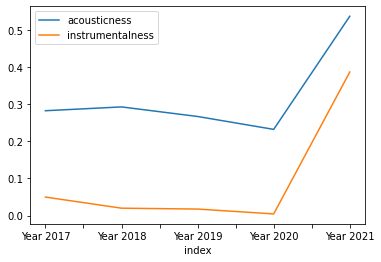

In [15]:
transposed_combined_df.plot(kind='line', x = 'index', y = ['acousticness','instrumentalness'])

In [16]:
column_list = transposed_combined_df.columns[1:]

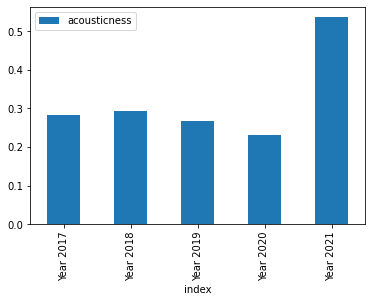

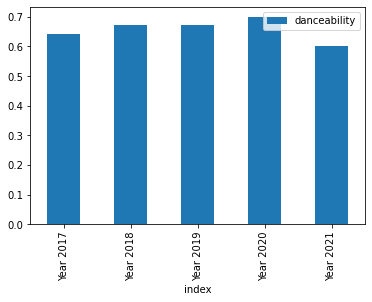

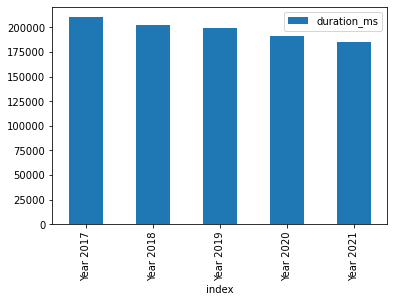

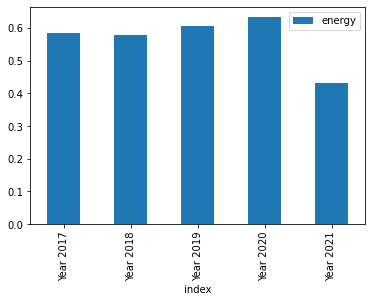

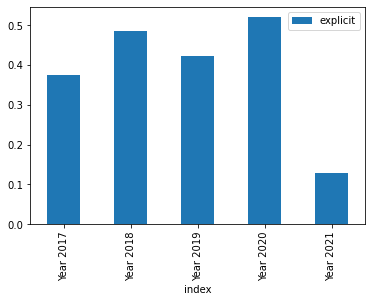

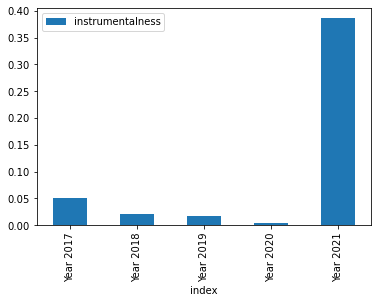

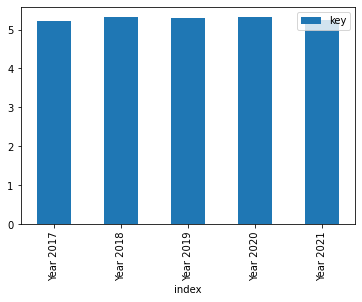

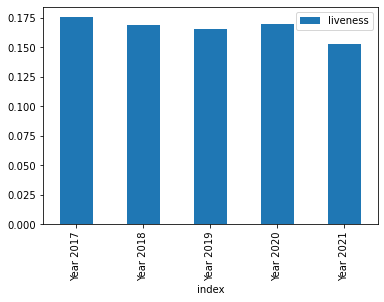

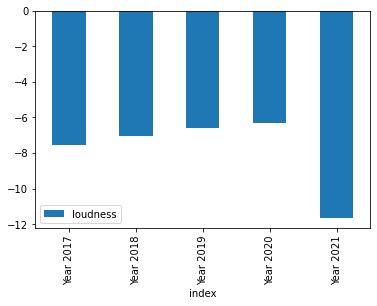

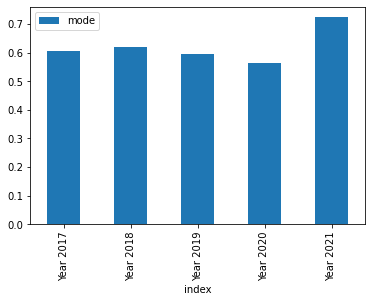

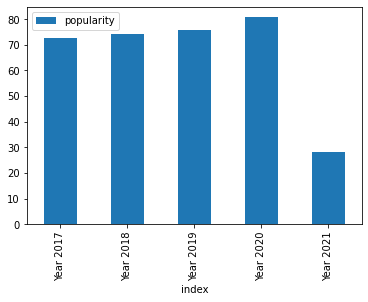

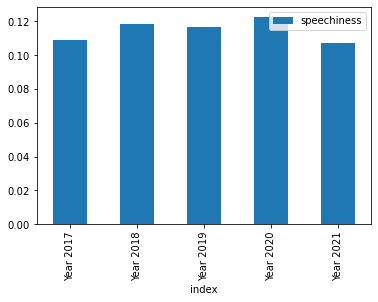

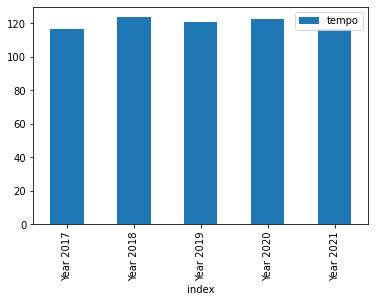

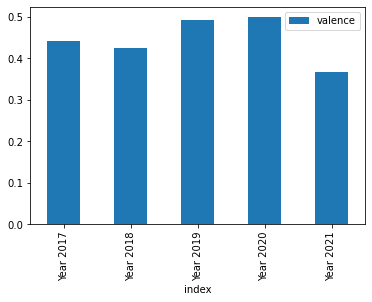

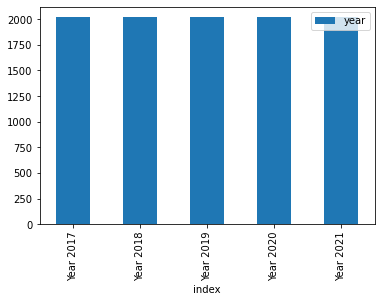

In [17]:
for i in column_list:
    transposed_combined_df.plot(kind = 'bar', x = 'index', y = i)

In [18]:
# year2001to2002_df =  artist_df.loc[(artist_df['year'] >=2001) &(artist_df['year'] <=2002)]
# year1933to1939_df = artist_df.loc[(artist_df['year'] >=1933) &(artist_df['year'] <=1939)]
# years1942to1945_df =artist_df.loc[(artist_df['year'] >=1942) &(artist_df['year'] <=1945)]
# years2007to2008_df = artist_df.loc[(artist_df['year'] >=2007) &(artist_df['year'] <=2008)]
# years1990to1992_df = artist_df.loc[(artist_df['year'] >=1990) &(artist_df['year'] <=1992)]

In [28]:
year1990_df = artist_df.loc[(artist_df['year'] >= 1990) & (artist_df['year']<=1992)].sort_values(['popularity'],ascending=False)
year1990_df_top = year1990_df.head(500)
year1990_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000
mean,0.270089,0.558960,257714.188000,0.623601,0.060000,0.052331,5.354000,0.178353,-9.428902,0.756000,62.5540,0.057282,119.282102,0.546492,1991.094000
std,0.292815,0.166789,67656.982361,0.224432,0.237725,0.169125,3.458411,0.139607,4.116575,0.429923,5.2228,0.052257,30.206897,0.255554,0.801529
min,0.000001,0.000000,63973.000000,0.003630,0.000000,0.000000,0.000000,0.022900,-36.759000,0.000000,56.0000,0.000000,0.000000,0.000000,1990.000000
25%,0.011700,0.434750,214630.250000,0.469250,0.000000,0.000000,2.000000,0.091075,-11.522250,1.000000,59.0000,0.030600,96.234750,0.341250,1990.000000
50%,0.154000,0.560500,251767.000000,0.652000,0.000000,0.000061,5.000000,0.128000,-8.831500,1.000000,61.0000,0.037400,116.696000,0.544500,1991.000000
75%,0.491250,0.681250,292026.500000,0.814500,0.000000,0.003510,8.000000,0.226000,-6.698000,1.000000,65.0000,0.056625,138.848000,0.767000,1992.000000
max,0.996000,0.980000,586076.000000,0.988000,1.000000,0.944000,11.000000,0.974000,-2.383000,1.000000,82.0000,0.379000,205.917000,0.987000,1992.000000


In [37]:
year1990_grouped = year1990_df_top.groupby(['year'])

In [40]:
year1990_grouped.mean().reset_index()

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,1990,0.256936,0.529598,260648.942446,0.646331,0.035971,0.077952,4.899281,0.175529,-9.272619,0.784173,62.345324,0.057762,119.884712,0.500174
1,1991,0.268434,0.564469,259911.177143,0.608783,0.034286,0.046950,5.828571,0.176413,-9.736874,0.697143,63.148571,0.052599,116.144063,0.537713
2,1992,0.281475,0.575720,253453.951613,0.620558,0.102151,0.038247,5.247312,0.182287,-9.255935,0.790323,62.150538,0.061330,121.784220,0.589366


In [31]:
year1990_final_df

,Year 2021
acousticness,0.270089
danceability,0.558960
duration_ms,257714.188000
energy,0.623601
explicit,0.060000
instrumentalness,0.052331
key,5.354000
liveness,0.178353
loudness,-9.428902
mode,0.756000
